In [122]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [136]:
def init_rand_graph(N:int, landa:int):
    """
    Generates random graphs using hash tables (python dictionaries)


    N: the total number of nodes of the graph

    landa: the average node degree
    """
    p = landa / N
    # This is basically the combination C(N,2), which gives the entire number of possible edges,
    # multipied by the probability of the edges to be formed. This gives us the number of total edges that we will have,
    # given the probability at hand.
    num_total_edges = int((N * (N-1) / 2) * p)
    nodes_list = np.arange(N)
    graph_dict = {key : [] for key in nodes_list}
    num_edges = 0
    while num_edges < num_total_edges:
        u, v = np.random.choice(nodes_list, size=2, replace=False)
        if v in graph_dict[u]:  # or u in graph_dict[v] is redundant
            continue
        else:
            graph_dict[u].append(v)
            graph_dict[v].append(u)
            num_edges += 1
    
    return graph_dict

$\Huge \lambda = 1$

In [ ]:
N = 10_000
landa = 1
nodes_degrees = np.zeros((6,N))
# The standard way to write the for loop is this:
# for j, key in enumerate(graph_dict):
# but we don't need to, simply because we know the keys are a list of numbers from 0 to N.
for i in range(6):
    graph_dict = init_rand_graph(N=N, landa=landa)
    for j in range(N):
        nodes_degrees[i, j] = (len(graph_dict[j]))


nodes_degrees = nodes_degrees.astype(np.int0)

In [ ]:
ys = [[] for i in range(6)]
for i in range(6):
    ys[i] = np.bincount(nodes_degrees[i]) / np.sum(nodes_degrees[i])

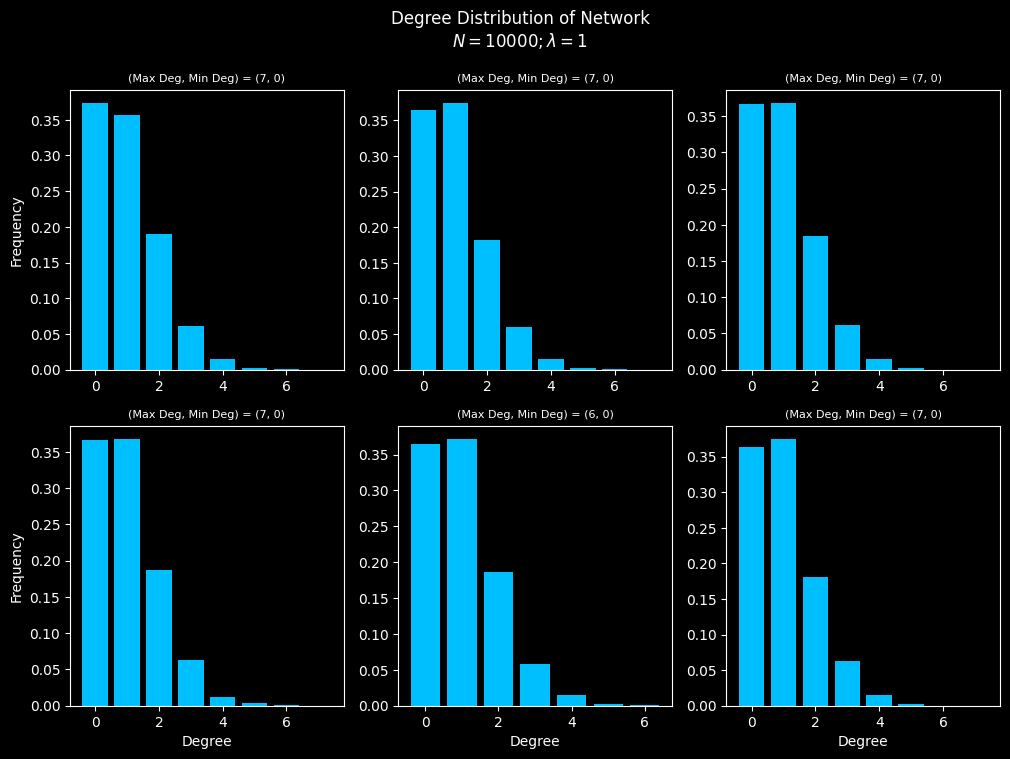

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle(f"Degree Distribution of Network\n$N = {N} ; \lambda = {landa}$")
# fig.tight_layout()

ax[0,0].bar(range(len(ys[0])), height=ys[0], color="deepskyblue")
ax[0,0].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[0])}, {min(nodes_degrees[0])})", fontsize=8)
ax[0,0].set_ylabel("Frequency")

ax[0,1].bar(range(len(ys[1])), height=ys[1], color="deepskyblue")
ax[0,1].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[1])}, {min(nodes_degrees[1])})", fontsize=8)


ax[0,2].bar(range(len(ys[2])), height=ys[2], color="deepskyblue")
ax[0,2].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[2])}, {min(nodes_degrees[2])})", fontsize=8)


ax[1,0].bar(range(len(ys[3])), height=ys[3], color="deepskyblue")
ax[1,0].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[3])}, {min(nodes_degrees[3])})", fontsize=8)
ax[1,0].set_xlabel("Degree")
ax[1,0].set_ylabel("Frequency")

ax[1,1].bar(range(len(ys[4])), height=ys[4], color="deepskyblue")
ax[1,1].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[4])}, {min(nodes_degrees[4])})", fontsize=8)
ax[1,1].set_xlabel("Degree")


ax[1,2].bar(range(len(ys[5])), height=ys[5], color="deepskyblue")
ax[1,2].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[5])}, {min(nodes_degrees[5])})", fontsize=8)
ax[1,2].set_xlabel("Degree");

In [ ]:
fig.savefig(f"lambda{landa}.jpg")

In [ ]:
np.mean(nodes_degrees) == landa

True

In [ ]:
np.max(nodes_degrees), np.min(nodes_degrees)

(7, 0)

In [ ]:
# Choose 1000 random non-equal nodes:
random_nodes = np.random.randint(low=0, high=N, size=1000)
# Each row of this matrix will contain the distribution count of one the 200 nodes' neighbors:
ys = np.zeros((1000, np.max(nodes_degrees)))
for i in range(1000):
    random_chosen_node = random_nodes[i]
    neighbors_list = graph_dict[random_chosen_node]
    # Each index in neighbors_degrees will correspond to the number of nodes that have that many neighbors.
    neighbors_degrees = np.zeros(np.max(nodes_degrees))
    for j in range(len(neighbors_list)):
        index = int(len(graph_dict[neighbors_list[j]])) - 1
        neighbors_degrees[index] += 1
        neighbors_degrees = neighbors_degrees.astype(np.int0)
    if np.sum(neighbors_degrees)==0:
        continue
    else:
        ys[i] = neighbors_degrees / np.sum(neighbors_degrees)


ys = np.mean(ys, axis=0)

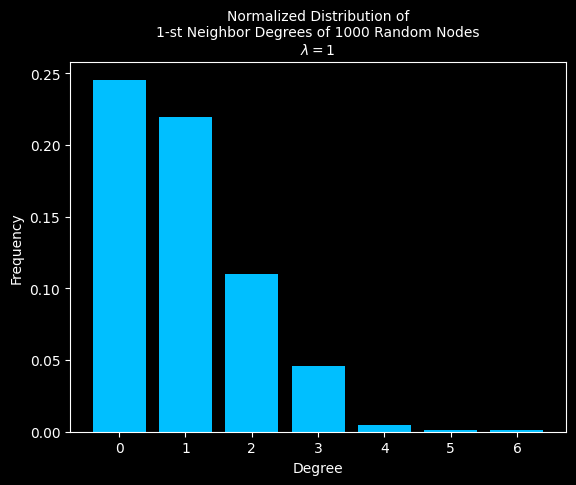

In [ ]:
fig, ax = plt.subplots()
ax.bar(range(len(ys)), ys, color="deepskyblue")
ax.set_title(f"Normalized Distribution of\n1-st Neighbor Degrees of 1000 Random Nodes\n$\lambda = {landa}$",
             fontsize=10)
ax.set_xlabel("Degree")
ax.set_ylabel("Frequency");

In [ ]:
fig.savefig(f"lambda{landa}_1stNeighbors.jpg")

$\Huge \lambda = 3$

In [329]:
N = 10_000
landa = 3
nodes_degrees = np.zeros((6,N))
# The standard way to write the for loop is this:
# for j, key in enumerate(graph_dict):
# but we don't need to, simply because we know the keys are a list of numbers from 0 to N.
for i in range(6):
    graph_dict = init_rand_graph(N=N, landa=landa)
    for j in range(N):
        nodes_degrees[i, j] = (len(graph_dict[j]))


nodes_degrees = nodes_degrees.astype(np.int0)

In [330]:
ys = [[] for i in range(6)]
for i in range(6):
    ys[i] = np.bincount(nodes_degrees[i]) / np.sum(nodes_degrees[i])

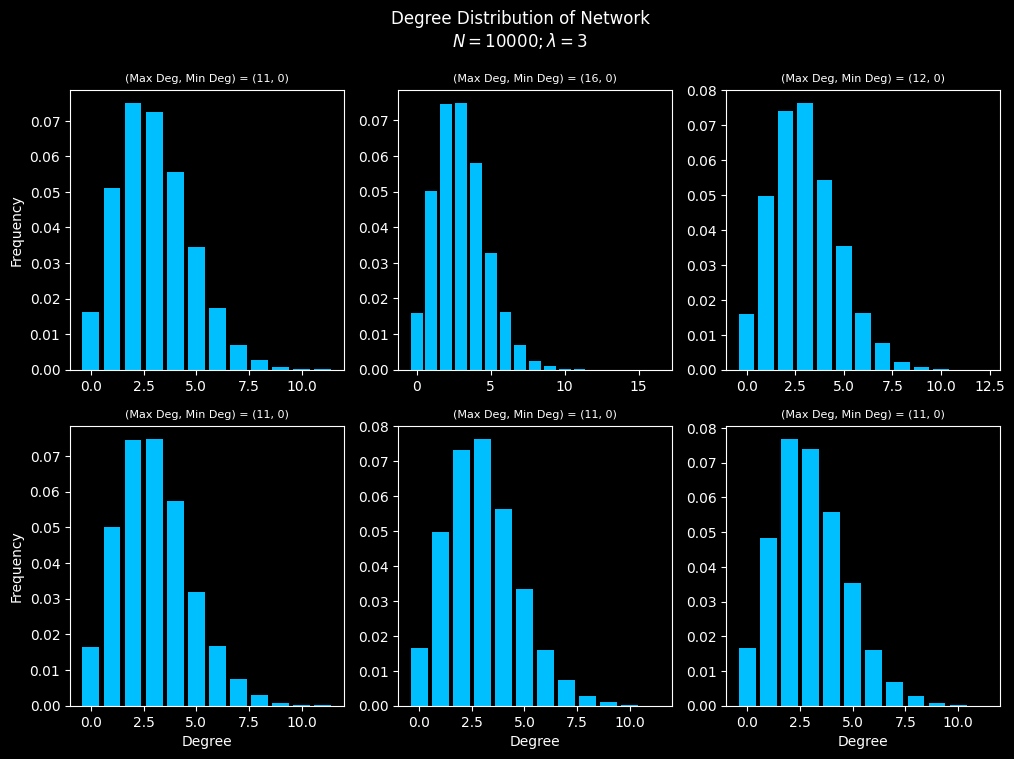

In [331]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle(f"Degree Distribution of Network\n$N = {N} ; \lambda = {landa}$")
# fig.tight_layout()

ax[0,0].bar(range(len(ys[0])), height=ys[0], color="deepskyblue")
ax[0,0].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[0])}, {min(nodes_degrees[0])})", fontsize=8)
ax[0,0].set_ylabel("Frequency")

ax[0,1].bar(range(len(ys[1])), height=ys[1], color="deepskyblue")
ax[0,1].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[1])}, {min(nodes_degrees[1])})", fontsize=8)


ax[0,2].bar(range(len(ys[2])), height=ys[2], color="deepskyblue")
ax[0,2].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[2])}, {min(nodes_degrees[2])})", fontsize=8)


ax[1,0].bar(range(len(ys[3])), height=ys[3], color="deepskyblue")
ax[1,0].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[3])}, {min(nodes_degrees[3])})", fontsize=8)
ax[1,0].set_xlabel("Degree")
ax[1,0].set_ylabel("Frequency")

ax[1,1].bar(range(len(ys[4])), height=ys[4], color="deepskyblue")
ax[1,1].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[4])}, {min(nodes_degrees[4])})", fontsize=8)
ax[1,1].set_xlabel("Degree")


ax[1,2].bar(range(len(ys[5])), height=ys[5], color="deepskyblue")
ax[1,2].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[5])}, {min(nodes_degrees[5])})", fontsize=8)
ax[1,2].set_xlabel("Degree");

In [332]:
fig.savefig(f"lambda{landa}.jpg")

In [333]:
np.mean(nodes_degrees) == landa

False

In [334]:
np.max(nodes_degrees), np.min(nodes_degrees)

(16, 0)

In [335]:
# Choose 1000 random non-equal nodes:
random_nodes = np.random.randint(low=0, high=N, size=1000)
# Each row of this matrix will contain the distribution count of one the 200 nodes' neighbors:
ys = np.zeros((1000, np.max(nodes_degrees)))
for i in range(1000):
    random_chosen_node = random_nodes[i]
    neighbors_list = graph_dict[random_chosen_node]
    # Each index in neighbors_degrees will correspond to the number of nodes that have that many neighbors.
    neighbors_degrees = np.zeros(np.max(nodes_degrees))
    for j in range(len(neighbors_list)):
        index = int(len(graph_dict[neighbors_list[j]])) - 1
        neighbors_degrees[index] += 1
        neighbors_degrees = neighbors_degrees.astype(np.int0)
    if np.sum(neighbors_degrees)==0:
        continue
    else:
        ys[i] = neighbors_degrees / np.sum(neighbors_degrees)


ys = np.mean(ys, axis=0)

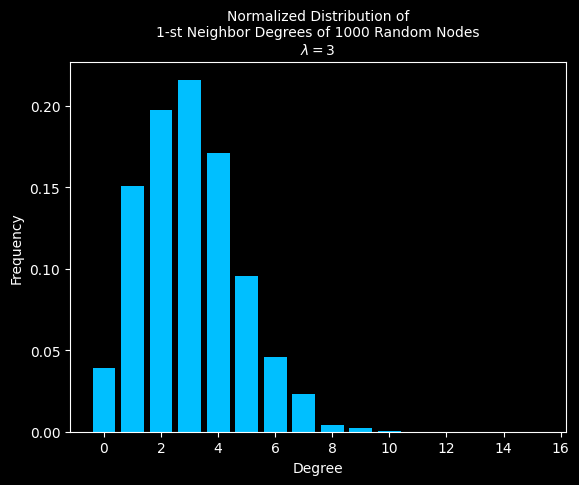

In [336]:
fig, ax = plt.subplots()
ax.bar(range(len(ys)), ys, color="deepskyblue")
ax.set_title(f"Normalized Distribution of\n1-st Neighbor Degrees of 1000 Random Nodes\n$\lambda = {landa}$",
             fontsize=10)
ax.set_xlabel("Degree")
ax.set_ylabel("Frequency");

In [337]:
fig.savefig(f"lambda{landa}_1stNeighbors.jpg")

$\Huge \lambda = 5$

In [292]:
N = 10_000
landa = 5
nodes_degrees = np.zeros((6,N))
# The standard way to write the for loop is this:
# for j, key in enumerate(graph_dict):
# but we don't need to, simply because we know the keys are a list of numbers from 0 to N.
for i in range(6):
    graph_dict = init_rand_graph(N=N, landa=landa)
    for j in range(N):
        nodes_degrees[i, j] = (len(graph_dict[j]))


nodes_degrees = nodes_degrees.astype(np.int0)

In [293]:
ys = [[] for i in range(6)]
for i in range(6):
    ys[i] = np.bincount(nodes_degrees[i]) / np.sum(nodes_degrees[i])
# np.histogram(nodes_degrees, bins=np.unique(nodes_degrees))
# data
# ys

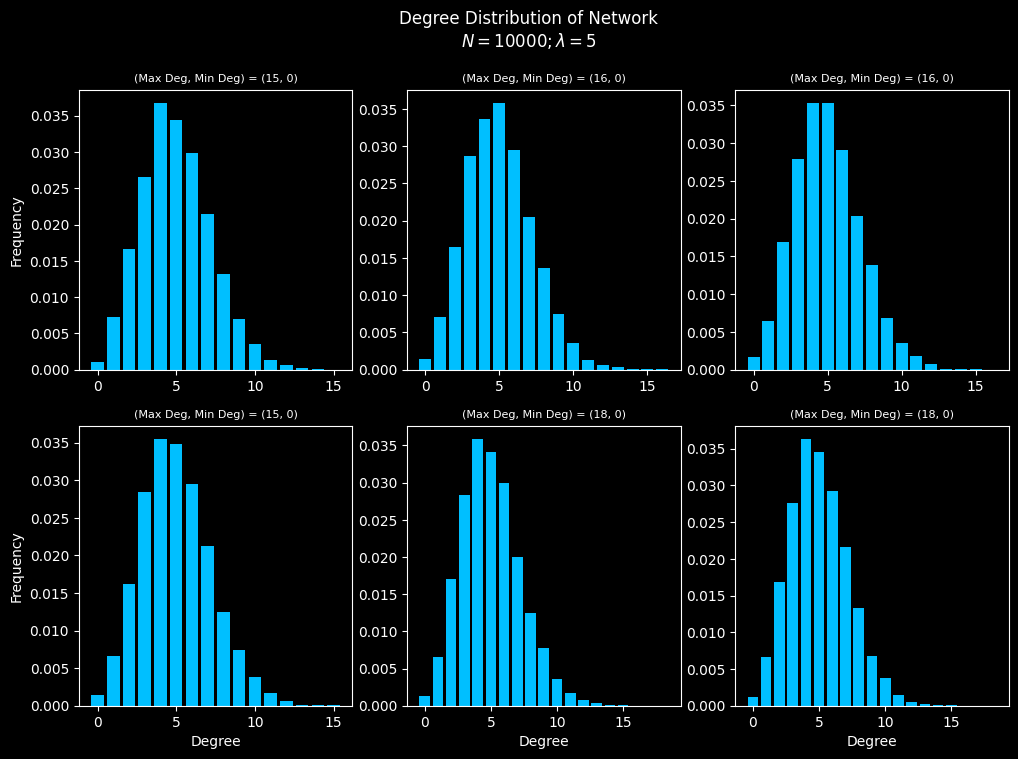

In [294]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle(f"Degree Distribution of Network\n$N = {N} ; \lambda = {landa}$")
# fig.tight_layout()

ax[0,0].bar(range(len(ys[0])), height=ys[0], color="deepskyblue")
ax[0,0].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[0])}, {min(nodes_degrees[0])})", fontsize=8)
ax[0,0].set_ylabel("Frequency")

ax[0,1].bar(range(len(ys[1])), height=ys[1], color="deepskyblue")
ax[0,1].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[1])}, {min(nodes_degrees[1])})", fontsize=8)


ax[0,2].bar(range(len(ys[2])), height=ys[2], color="deepskyblue")
ax[0,2].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[2])}, {min(nodes_degrees[2])})", fontsize=8)


ax[1,0].bar(range(len(ys[3])), height=ys[3], color="deepskyblue")
ax[1,0].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[3])}, {min(nodes_degrees[3])})", fontsize=8)
ax[1,0].set_xlabel("Degree")
ax[1,0].set_ylabel("Frequency")

ax[1,1].bar(range(len(ys[4])), height=ys[4], color="deepskyblue")
ax[1,1].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[4])}, {min(nodes_degrees[4])})", fontsize=8)
ax[1,1].set_xlabel("Degree")


ax[1,2].bar(range(len(ys[5])), height=ys[5], color="deepskyblue")
ax[1,2].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[5])}, {min(nodes_degrees[5])})", fontsize=8)
ax[1,2].set_xlabel("Degree");

In [295]:
fig.savefig(f"lambda{landa}.jpg")

In [296]:
np.mean(nodes_degrees) == landa

True

In [297]:
np.max(nodes_degrees), np.min(nodes_degrees)

(18, 0)

In [298]:
# Choose 1000 random non-equal nodes:
random_nodes = np.random.randint(low=0, high=N, size=1000)
# Each row of this matrix will contain the distribution count of one the 200 nodes' neighbors:
ys = np.zeros((1000, np.max(nodes_degrees)))
for i in range(1000):
    random_chosen_node = random_nodes[i]
    neighbors_list = graph_dict[random_chosen_node]
    # Each index in neighbors_degrees will correspond to the number of nodes that have that many neighbors.
    neighbors_degrees = np.zeros(np.max(nodes_degrees))
    for j in range(len(neighbors_list)):
        index = int(len(graph_dict[neighbors_list[j]])) - 1
        neighbors_degrees[index] += 1
        neighbors_degrees = neighbors_degrees.astype(np.int0)
    if np.sum(neighbors_degrees)==0:
        continue
    else:
        ys[i] = neighbors_degrees / np.sum(neighbors_degrees)


ys = np.mean(ys, axis=0)

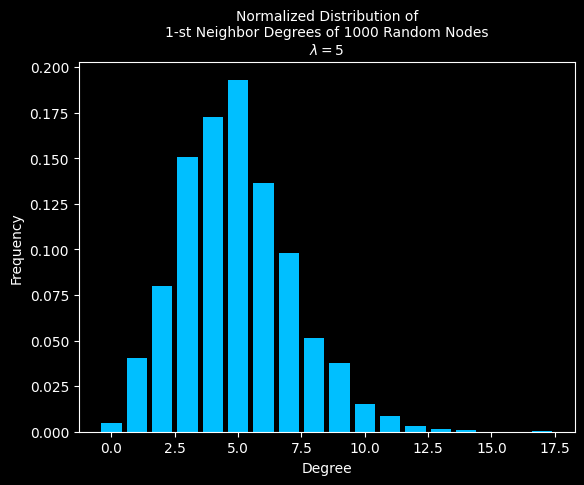

In [299]:
fig, ax = plt.subplots()
ax.bar(range(len(ys)), ys, color="deepskyblue")
ax.set_title(f"Normalized Distribution of\n1-st Neighbor Degrees of 1000 Random Nodes\n$\lambda = {landa}$",
             fontsize=10)
ax.set_xlabel("Degree")
ax.set_ylabel("Frequency");

In [300]:
fig.savefig(f"lambda{landa}_1stNeighbors.jpg")

$\Huge \lambda = 10$

In [311]:
N = 10_000
landa = 10
nodes_degrees = np.zeros((6,N))
# The standard way to write the for loop is this:
# for j, key in enumerate(graph_dict):
# but we don't need to, simply because we know the keys are a list of numbers from 0 to N.
for i in range(6):
    graph_dict = init_rand_graph(N=N, landa=landa)
    for j in range(N):
        nodes_degrees[i, j] = (len(graph_dict[j]))


nodes_degrees = nodes_degrees.astype(np.int0)

In [312]:
ys = [[] for i in range(6)]
for i in range(6):
    ys[i] = np.bincount(nodes_degrees[i]) / np.sum(nodes_degrees[i])

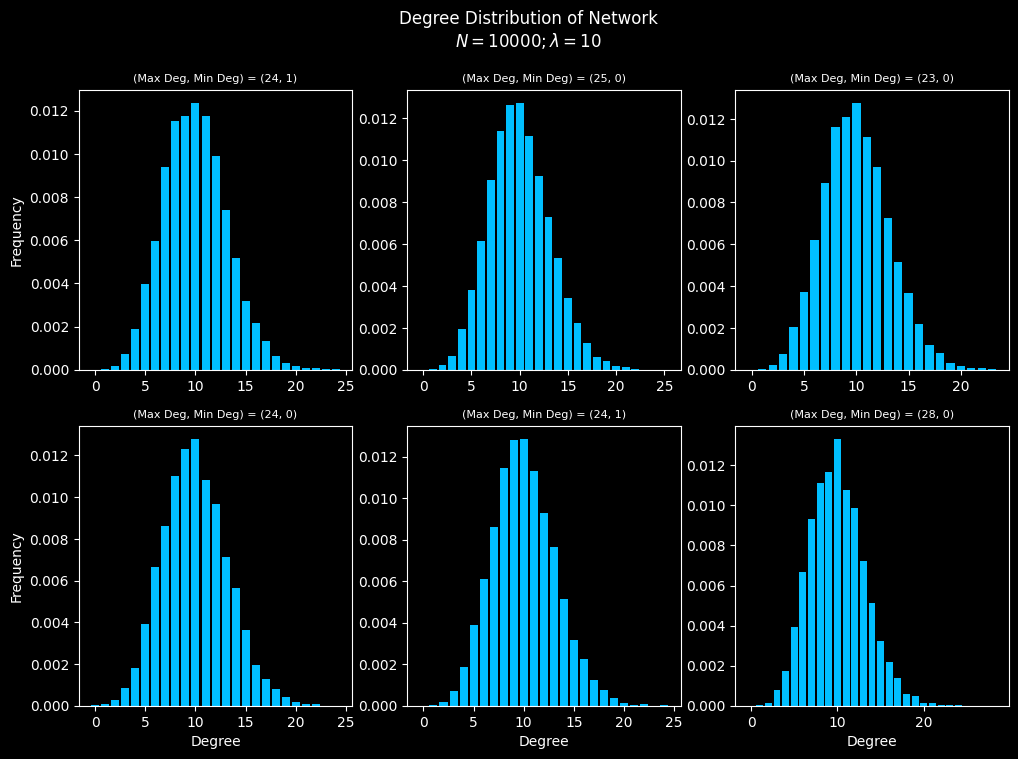

In [313]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle(f"Degree Distribution of Network\n$N = {N} ; \lambda = {landa}$")
# fig.tight_layout()

ax[0,0].bar(range(len(ys[0])), height=ys[0], color="deepskyblue")
ax[0,0].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[0])}, {min(nodes_degrees[0])})", fontsize=8)
ax[0,0].set_ylabel("Frequency")

ax[0,1].bar(range(len(ys[1])), height=ys[1], color="deepskyblue")
ax[0,1].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[1])}, {min(nodes_degrees[1])})", fontsize=8)


ax[0,2].bar(range(len(ys[2])), height=ys[2], color="deepskyblue")
ax[0,2].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[2])}, {min(nodes_degrees[2])})", fontsize=8)


ax[1,0].bar(range(len(ys[3])), height=ys[3], color="deepskyblue")
ax[1,0].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[3])}, {min(nodes_degrees[3])})", fontsize=8)
ax[1,0].set_xlabel("Degree")
ax[1,0].set_ylabel("Frequency")

ax[1,1].bar(range(len(ys[4])), height=ys[4], color="deepskyblue")
ax[1,1].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[4])}, {min(nodes_degrees[4])})", fontsize=8)
ax[1,1].set_xlabel("Degree")


ax[1,2].bar(range(len(ys[5])), height=ys[5], color="deepskyblue")
ax[1,2].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[5])}, {min(nodes_degrees[5])})", fontsize=8)
ax[1,2].set_xlabel("Degree");

In [314]:
fig.savefig(f"lambda{landa}.jpg")

In [315]:
np.mean(nodes_degrees) == landa

True

In [316]:
np.max(nodes_degrees), np.min(nodes_degrees)

(28, 0)

In [317]:
# Choose 1000 random non-equal nodes:
random_nodes = np.random.randint(low=0, high=N, size=1000)
# Each row of this matrix will contain the distribution count of one the 200 nodes' neighbors:
ys = np.zeros((1000, np.max(nodes_degrees)))
for i in range(1000):
    random_chosen_node = random_nodes[i]
    neighbors_list = graph_dict[random_chosen_node]
    # Each index in neighbors_degrees will correspond to the number of nodes that have that many neighbors.
    neighbors_degrees = np.zeros(np.max(nodes_degrees))
    for j in range(len(neighbors_list)):
        index = int(len(graph_dict[neighbors_list[j]])) - 1
        neighbors_degrees[index] += 1
        neighbors_degrees = neighbors_degrees.astype(np.int0)
    if np.sum(neighbors_degrees)==0:
        continue
    else:
        ys[i] = neighbors_degrees / np.sum(neighbors_degrees)


ys = np.mean(ys, axis=0)

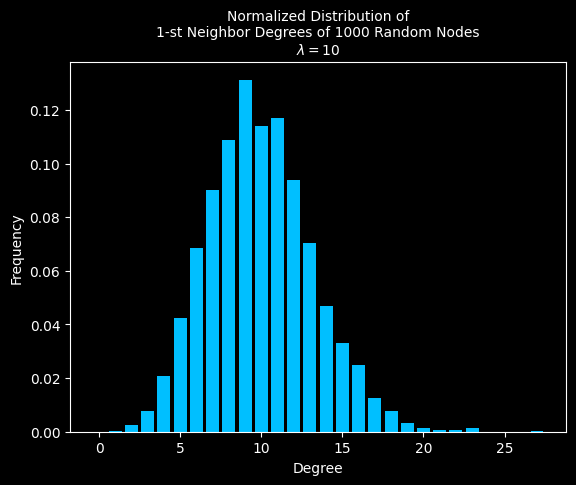

In [318]:
fig, ax = plt.subplots()
ax.bar(range(len(ys)), ys, color="deepskyblue")
ax.set_title(f"Normalized Distribution of\n1-st Neighbor Degrees of 1000 Random Nodes\n$\lambda = {landa}$",
             fontsize=10)
ax.set_xlabel("Degree")
ax.set_ylabel("Frequency");

In [319]:
fig.savefig(f"lambda{landa}_1stNeighbors.jpg")

$\Huge \lambda = 50$

In [320]:
N = 10_000
landa = 50
nodes_degrees = np.zeros((6,N))
# The standard way to write the for loop is this:
# for j, key in enumerate(graph_dict):
# but we don't need to, simply because we know the keys are a list of numbers from 0 to N.
for i in range(6):
    graph_dict = init_rand_graph(N=N, landa=landa)
    for j in range(N):
        nodes_degrees[i, j] = (len(graph_dict[j]))


nodes_degrees = nodes_degrees.astype(np.int0)

In [321]:
ys = [[] for i in range(6)]
for i in range(6):
    ys[i] = np.bincount(nodes_degrees[i]) / np.sum(nodes_degrees[i])

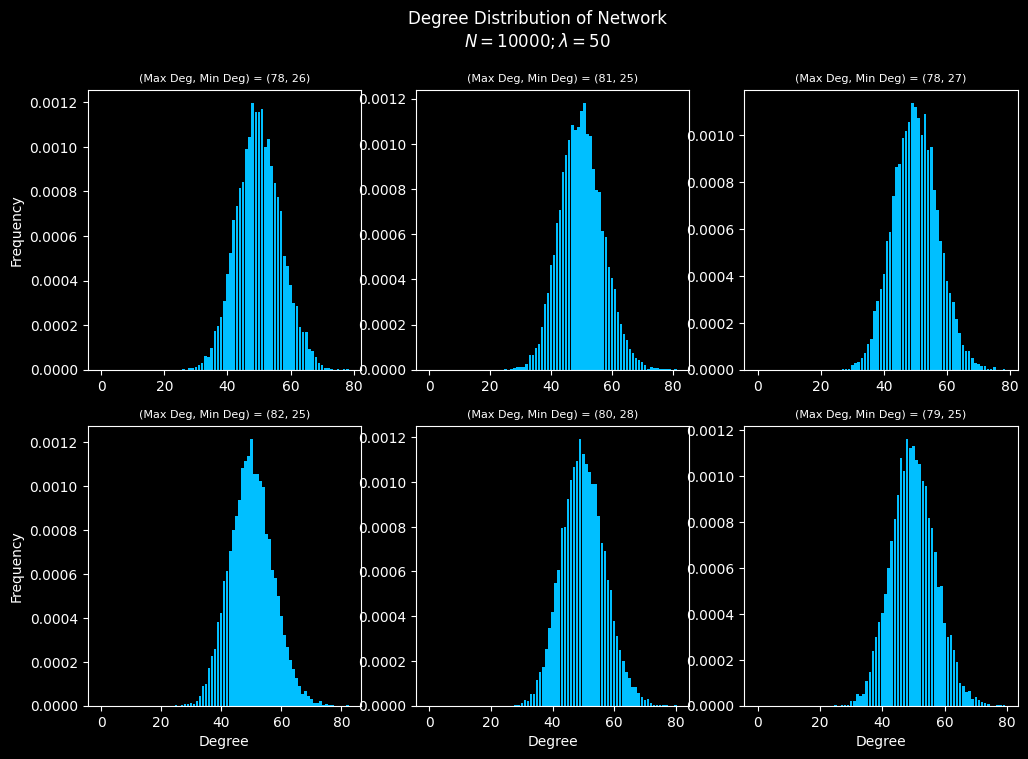

In [322]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle(f"Degree Distribution of Network\n$N = {N} ; \lambda = {landa}$")
# fig.tight_layout()

ax[0,0].bar(range(len(ys[0])), height=ys[0], color="deepskyblue")
ax[0,0].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[0])}, {min(nodes_degrees[0])})", fontsize=8)
ax[0,0].set_ylabel("Frequency")

ax[0,1].bar(range(len(ys[1])), height=ys[1], color="deepskyblue")
ax[0,1].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[1])}, {min(nodes_degrees[1])})", fontsize=8)


ax[0,2].bar(range(len(ys[2])), height=ys[2], color="deepskyblue")
ax[0,2].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[2])}, {min(nodes_degrees[2])})", fontsize=8)


ax[1,0].bar(range(len(ys[3])), height=ys[3], color="deepskyblue")
ax[1,0].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[3])}, {min(nodes_degrees[3])})", fontsize=8)
ax[1,0].set_xlabel("Degree")
ax[1,0].set_ylabel("Frequency")

ax[1,1].bar(range(len(ys[4])), height=ys[4], color="deepskyblue")
ax[1,1].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[4])}, {min(nodes_degrees[4])})", fontsize=8)
ax[1,1].set_xlabel("Degree")


ax[1,2].bar(range(len(ys[5])), height=ys[5], color="deepskyblue")
ax[1,2].set_title(f"(Max Deg, Min Deg) = ({max(nodes_degrees[5])}, {min(nodes_degrees[5])})", fontsize=8)
ax[1,2].set_xlabel("Degree");

In [323]:
fig.savefig(f"lambda{landa}.jpg")

In [324]:
np.mean(nodes_degrees) == landa

True

In [325]:
np.max(nodes_degrees), np.min(nodes_degrees)

(82, 25)

In [326]:
# Choose 1000 random non-equal nodes:
random_nodes = np.random.randint(low=0, high=N, size=1000)
# Each row of this matrix will contain the distribution count of one the 200 nodes' neighbors:
ys = np.zeros((1000, np.max(nodes_degrees)))
for i in range(1000):
    random_chosen_node = random_nodes[i]
    neighbors_list = graph_dict[random_chosen_node]
    # Each index in neighbors_degrees will correspond to the number of nodes that have that many neighbors.
    neighbors_degrees = np.zeros(np.max(nodes_degrees))
    for j in range(len(neighbors_list)):
        index = int(len(graph_dict[neighbors_list[j]])) - 1
        neighbors_degrees[index] += 1
        neighbors_degrees = neighbors_degrees.astype(np.int0)
    if np.sum(neighbors_degrees)==0:
        continue
    else:
        ys[i] = neighbors_degrees / np.sum(neighbors_degrees)


ys = np.mean(ys, axis=0)

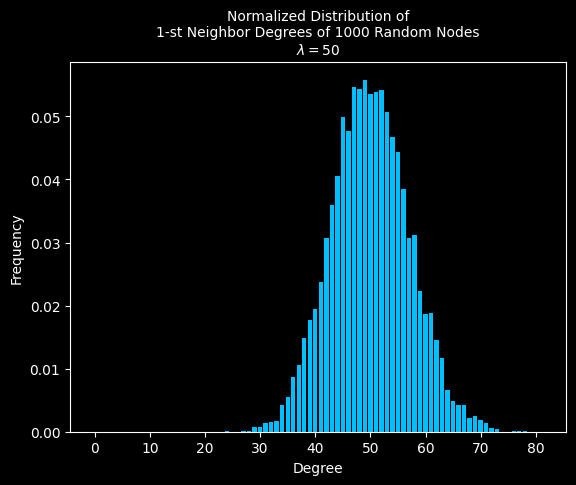

In [327]:
fig, ax = plt.subplots()
ax.bar(range(len(ys)), ys, color="deepskyblue")
ax.set_title(f"Normalized Distribution of\n1-st Neighbor Degrees of 1000 Random Nodes\n$\lambda = {landa}$",
             fontsize=10)
ax.set_xlabel("Degree")
ax.set_ylabel("Frequency");

In [328]:
fig.savefig(f"lambda{landa}_1stNeighbors.jpg")